In [123]:
import matplotlib.pyplot as plt

In [124]:
# salient weights are 1%, q_group_size is 128
results = {'AWQ': {#'meta-llama/Llama-3.2-1B': {'w16a16': 9.292861938476562, 'w8a8': 9.300487518310547, 'w8a4': 10.80977725982666, 'w4a8': 10.623530387878418, 'w4a4': 12.593931198120117}, 
                   'meta-llama/Meta-Llama-3-8B': {'w16a16': 5.911620140075684, 'w8a8': 5.916000843048096, 'w8a4': 6.52987003326416, 'w4a8': 6.414330959320068, 'w4a4': 7.088661193847656},
                   },
           'Mixed Precision': {'meta-llama/Meta-Llama-3-8B': {'w16a16': 5.911618232727051, 'w8a8': 5.916637897491455, 'w8a4': 6.7108588218688965, 'w4a8': 6.370568752288818, 'w4a4': 7.2607316970825195},
                     }}

### Quantization of LLaMA3-8B

For this experiment, all quantization is done with $q\_group\_size = 128$.

for mixed precision, $salient\_weight\_p = 1$ (1%).

Text(0.5, 1.0, 'Quantization of LLaMA3-8B')

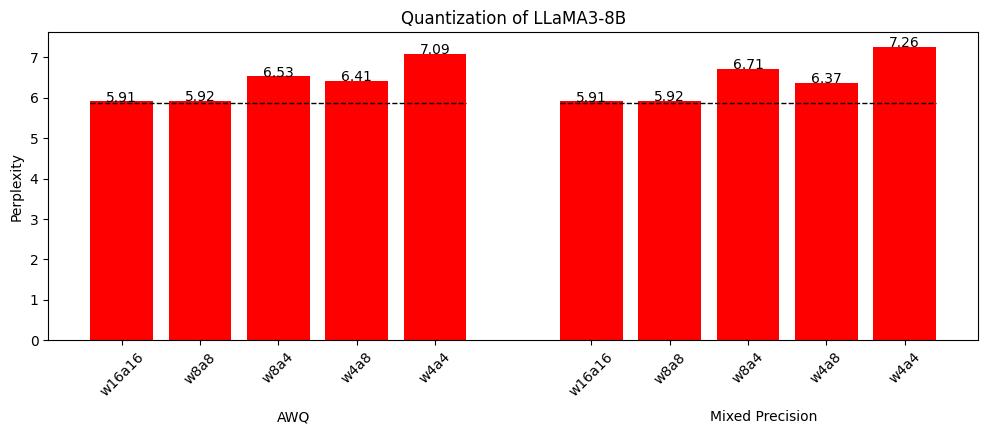

In [142]:
fig, axes = plt.subplots(1, 1, figsize=(12,4))

i = 0
labels = []
axes.set_xticks([0,1,2,3,4,6,7,8,9,10])

for method in results.keys():
    for model in results[method].keys():
        for quant_level in results[method][model].keys():
            labels.append(quant_level)
            if i == 5: i+=1
            height = results[method][model][quant_level]
            bar = axes.bar(i, height, color='r')
            axes.text(i, height, round(height, 2), ha='center')
            
            if (i) == 0 or i == 6: axes.hlines(height-0.03, i-0.4, i+4.4, color='k', linewidth=1, linestyle='dashed')
            i+=1

for j, method in enumerate(results):
    plt.text(2.2+6*j, -2, method, fontsize=10, ha='center')

axes.set_xticklabels(labels, rotation=45)
axes.set_ylabel('Perplexity')
axes.set_title('Quantization of LLaMA3-8B')

### Number of bits to represent activations

weights are all in 4 bit.

For this experiment, all quantization is done with $q\_group\_size = 128$.

for mixed precision, $salient\_weight\_p = 1$ (1%).

Text(0.5, 0.98, 'Bits per Activation vs Perplexity (W4) for LLaMA3-8B')

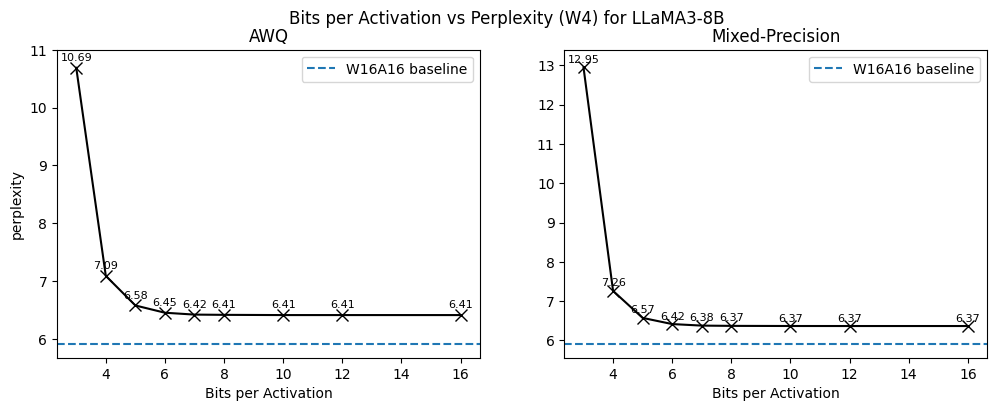

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

activation_bit_results = {
    'awq': {'meta-llama/Meta-Llama-3-8B': {'w4a16': 6.410315990447998, 'w4a12': 6.410460948944092, 'w4a10': 6.410414218902588, 'w4a8': 6.414330959320068, 'w4a7': 6.418610572814941, 'w4a6': 6.45092248916626, 'w4a5': 6.57652473449707, 'w4a4': 7.088661193847656, 'w4a3': 10.688019752502441}},
    'mixed': {'meta-llama/Meta-Llama-3-8B': {'w4a16': 6.3666205406188965, 'w4a12': 6.366648197174072, 'w4a10': 6.367191791534424, 'w4a8': 6.370568752288818, 'w4a7': 6.377339839935303, 'w4a6': 6.416344165802002, 'w4a5': 6.573369026184082, 'w4a4': 7.2607316970825195, 'w4a3': 12.948014259338379}},
    }

x=[16,12,10,8,7,6,5,4,3]
for i, method in enumerate(activation_bit_results.keys()):
    y = [activation_bit_results[method]['meta-llama/Meta-Llama-3-8B'][f'w4a{xval}'] for xval in x]
    axes[i].plot(x, y, marker = 'x', markersize=8, c='k')
    for x_i, y_i in zip(x,y):
        axes[i].text(x_i, y_i+0.12, round(y_i,2), ha='center', fontsize=8)
    axes[i].axhline(5.9116, label='W16A16 baseline', linestyle='--')


axes[0].set_ylim(top=11)
axes[1].set_ylim(top=13.4)

axes[0].set_ylabel('perplexity')
axes[0].set_title('AWQ')
axes[1].set_title('Mixed-Precision')
axes[0].set_xlabel('Bits per Activation')
axes[1].set_xlabel('Bits per Activation')
axes[0].legend()
axes[1].legend()
fig.suptitle('Bits per Activation vs Perplexity (W4) for LLaMA3-8B')
# plt.tight_layout()

### Quantization Group Size vs Perplexity

For this experiment, all quantization is done with $q\_group\_size = 128$.

for mixed precision, $salient\_weight\_p = 1$ (1%).

Text(0.5, 0.98, 'Quantization Group Size vs Perplexity (W4A4) for LLaMA3-8B')

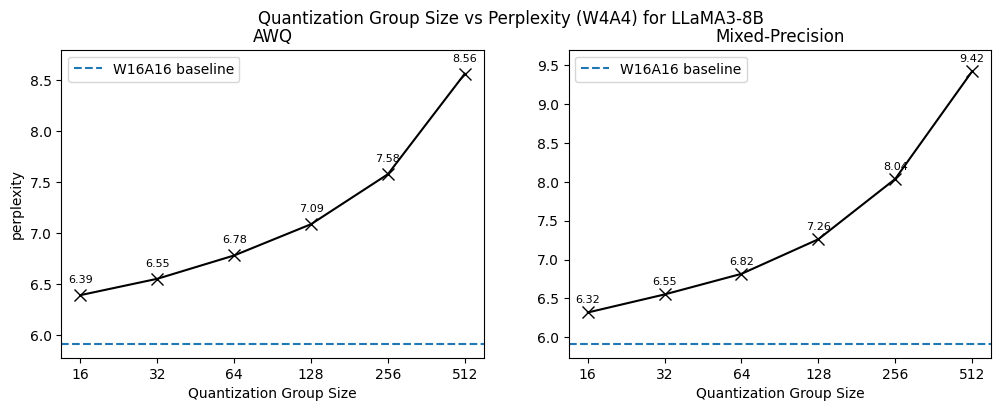

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

group_results = {
    'awq': {'meta-llama/Meta-Llama-3-8B': {'w4a4g16': 6.393080711364746, 'w4a4g32': 6.553305149078369, 'w4a4g64': 6.782249450683594, 'w4a4g128': 7.088661193847656, 'w4a4g256': 7.579264163970947, 'w4a4g512': 8.564993858337402}},
    'mixed': {'meta-llama/Meta-Llama-3-8B': {'w4a4g16': 6.3182902336120605, 'w4a4g32': 6.550797462463379, 'w4a4g64': 6.8158111572265625, 'w4a4g128': 7.2607316970825195, 'w4a4g256': 8.036529541015625, 'w4a4g512': 9.420909881591797}}
    
}


g=[16,32,64,128,256,512]
for i, method in enumerate(group_results.keys()):
    y = [group_results[method]['meta-llama/Meta-Llama-3-8B'][f'w4a4g{gval}'] for gval in g]
    axes[i].plot(g, y, marker = 'x', markersize=8, c='k')
    axes[i].set_xscale('log', base=2)
    axes[i].set_xticks(g)
    axes[i].set_xticklabels(g)
    for x_i, y_i in zip(g,y):
        axes[i].text(x_i, y_i+0.12, round(y_i,2), ha='center', fontsize=8)
    axes[i].axhline(5.9116, label='W16A16 baseline', linestyle='--')

axes[0].set_ylim(top=8.8)
axes[1].set_ylim(top=9.7)

axes[0].set_ylabel('perplexity')
axes[0].set_title('AWQ')
axes[1].set_title('Mixed-Precision')
axes[0].set_xlabel('Quantization Group Size')
axes[1].set_xlabel('Quantization Group Size')
axes[1].legend()
axes[0].legend()
fig.suptitle('Quantization Group Size vs Perplexity (W4A4) for LLaMA3-8B')

Text(0.5, 0.98, 'Percentage of Values Preserved vs Perplexity (W4A4) for LLaMA3-8B')

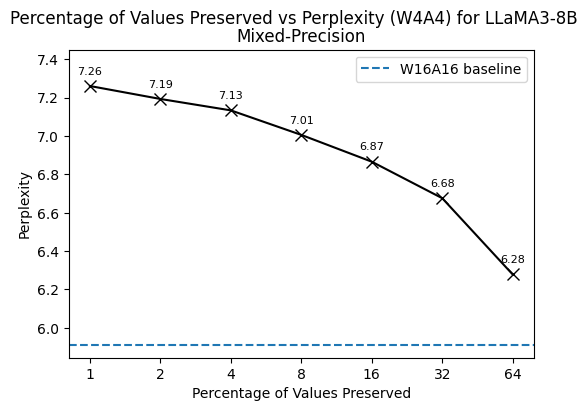

In [128]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))

salient_channel_results = {
    'mixed': {'meta-llama/Meta-Llama-3-8B': {'w4a4s1': 7.2607316970825195, 'w4a4s2': 7.193248748779297, 'w4a4s4': 7.133746147155762, 'w4a4s8': 7.005881309509277, 'w4a4s16': 6.866158962249756, 'w4a4s32': 6.675899505615234, 'w4a4s64': 6.2782392501831055}}
}


sp = [1, 2, 4, 8, 16, 32, 64]
for i, method in enumerate(salient_channel_results.keys()):
    y = [salient_channel_results[method]['meta-llama/Meta-Llama-3-8B'][f'w4a4s{sp_val}'] for sp_val in sp]
    axes.plot(sp, y, marker = 'x', markersize=8, c='k')
    axes.set_xscale('log', base=2)
    axes.set_xticks(sp)
    axes.set_xticklabels(sp)
    for x_i, y_i in zip(sp,y):
        axes.text(x_i, y_i+0.06, round(y_i,2), ha='center', fontsize=8)
    axes.axhline(5.9116, label='W16A16 baseline', linestyle='--')

axes.set_ylim(top=7.45)

axes.set_title('Mixed-Precision')
axes.set_ylabel('Perplexity')
axes.set_xlabel('Percentage of Values Preserved')
axes.legend()
fig.suptitle('Percentage of Values Preserved vs Perplexity (W4A4) for LLaMA3-8B')

### Distribution of Scaling Factors

During AWQ with default params:
q_group_size = 128.

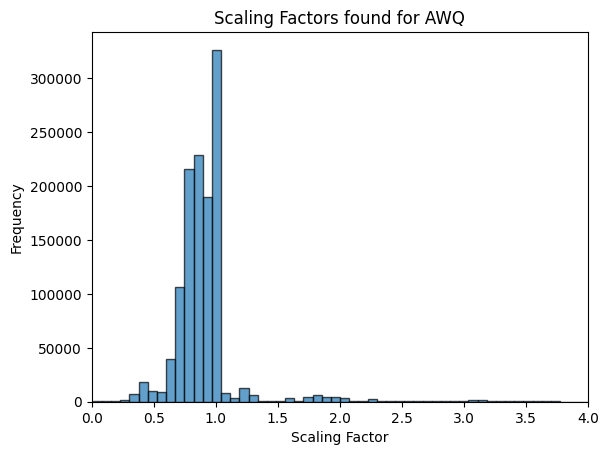

biggest scaling factors:
[147.78932189941406, 121.263671875, 89.23131561279297, 88.47100067138672, 86.20259857177734, 85.52140808105469, 83.87232971191406, 81.4306640625, 80.48686981201172, 77.65856170654297, 73.52127075195312, 72.50664520263672, 72.07237243652344, 71.5311508178711, 71.03923034667969, 69.63301086425781, 69.6214828491211, 69.56926727294922, 68.95830535888672, 68.55458068847656, 67.50358581542969, 66.26732635498047, 66.2518310546875, 65.89014434814453, 63.678497314453125, 63.467071533203125, 63.3980712890625, 63.33609390258789, 63.04344940185547, 62.691993713378906, 62.66792297363281, 62.475379943847656, 62.45078659057617, 62.2278938293457, 62.203956604003906, 61.88009262084961, 61.79594039916992, 61.78763961791992, 61.23945236206055, 61.102699279785156, 61.03333282470703, 61.011268615722656, 60.8974609375, 60.87760925292969, 60.72881317138672, 59.824405670166016, 59.72422409057617, 59.18097686767578, 58.7370719909668, 58.301177978515625, 58.1717529296875, 57.75155258178

In [166]:
import matplotlib.pyplot as plt
import json 

# Generate random data


with open('scaling.json', 'r') as file:
    x = json.load(file)


# Plot histogram
plt.hist(x, bins=2000, edgecolor='black', alpha=0.7) # , range=(0,10)
plt.xlim(left=0, right=4)
plt.title('Scaling Factors found for AWQ')
plt.xlabel('Scaling Factor')
plt.ylabel('Frequency')
plt.show()

print('biggest scaling factors:')
print(sorted(x, reverse=True)[:100])